# LAB 1 : Linear Regression with 1 Variable + Gradient descent visualisation.

The file LRdata1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates that its a loss and its not a good city to gather money.    


In [7]:
# Some useful libraries to use in this assignment

from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour ,figure
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# First step

We are going to plot the dataset and see if we can apply linear regression to fit the data.

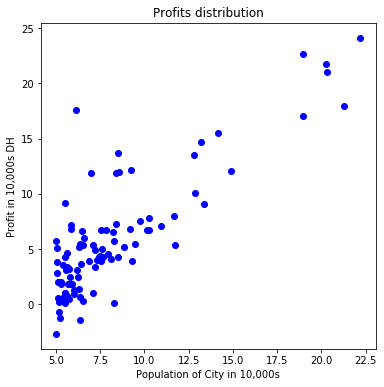

In [2]:
#Load the dataset
data = loadtxt('LRdata1.txt', delimiter=',')

#Plot the data
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in 10,000s DH')
show()

it appreas to be a linear relationship between the too variable.

# Function to compute cost
In the next code cell contains the implementation of the cost fuction <br><br>
![alt text](cost_function.png "Cost Function Formula")


In [3]:
#Evaluate the linear regression
def compute_cost(X, y, W):
    '''
    This function will compute the cost for your linear regression model
    '''
    #Number of training samples
    m  = y.size
    
    '''
    print ("X :",X.shape)
    print ("W :",W.shape)
    print ("y :",y.shape)
    '''
    
    #The formula
    predictions = X.dot(W).flatten()
    J = ((predictions - y)**2).sum()

    return J/(2*m)

# Gradient descent

gradient_descent that has five parameters: X, y, W, alpha and num_iters
alpha: the learning rate
num_iters: the number of iterations before we find the best parameters Ws. <br><br>

![alt text](Gradient_Descent.png "Cost Function Formula")


In [17]:
# This fucntion will compute the gradient descent for your linear regression model
import time
def gradient_descent(X, y, W, alpha, num_iters,flag_print):

    m = y.size
    History = [W]
    J_History = []

    for i in range(num_iters):
        
        """ 
            We will use flatten function because it will return a copy of the array collapsed into one dimension.
            which will be useful for our problem
        """
        
        predictions = X.dot(W).flatten()
                
        # Your code goes here
        
        W[0,0] = W[0,0] - alpha * (predictions - y).sum() / m
        W[1,0] = W[1,0] - alpha * ((X[:,1]*(predictions - y)).sum()) / m
        
        # End of your code
        History.append(W)
        J_History.append(compute_cost(X, y, W))
        """ 
        it's very useful to print the cost function J in every iteration and see if its decreasing 
            or increasing (in theory it should decrease)
        """
        if(flag_print):
            if(i%1000 == 0):
                time.sleep(0.1)
                
                # We will plot the data
                clear_output(wait=True)
                matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
                scatter(data[:, 0], data[:, 1], marker='o', c='b')
                title('Profits distribution')
                xlabel('Population of City in 10,000s')
                ylabel('Profit in 10,000s DH')

                #Plot the results
                result = new_X.dot(W).flatten()
                plot(data[:, 0], result)
                show()
                
                #print("iteration :",i," J : ",compute_cost(X,y,W))
                #print("weights  : ",W.flatten() )
        
    return W,History,J_History

# Execution
## Initialisation of data and variables

In [33]:
#Initialisation
X = data[:, 0]
y = data[:, 1]

#number of training samples
m = y.size

#Adding a column of ones to X (interception data)
new_X = ones(shape=(m, 2))
new_X[:, 1] = X

#Here, we initialize W parameters by zero
W = zeros(shape=(2, 1))

#compute and print the initial cost, W after apply gradient descent
print("This is the initial cost J : ",compute_cost(new_X,y,W),"\n")

This is the initial cost J :  32.072733877455676 



# Testin with Alpha = 0.001

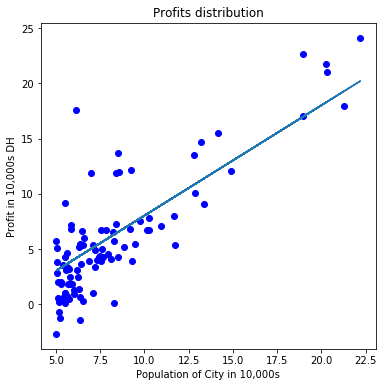

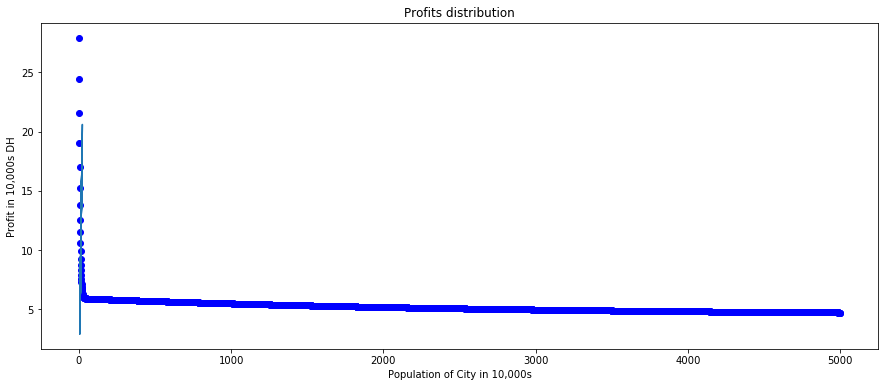

In [34]:
W = zeros(shape=(2, 1))
W1,History,J = gradient_descent(new_X,y,W,0.001,5000,1)

matplotlib.rcParams['figure.figsize'] = (15, 6.0)
scatter(range(0,len(J)), J, marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in 10,000s DH')

#Plot the results
result = new_X.dot(W).flatten()
plot(data[:, 0], result)
show()

1649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 4.495981649220805, 

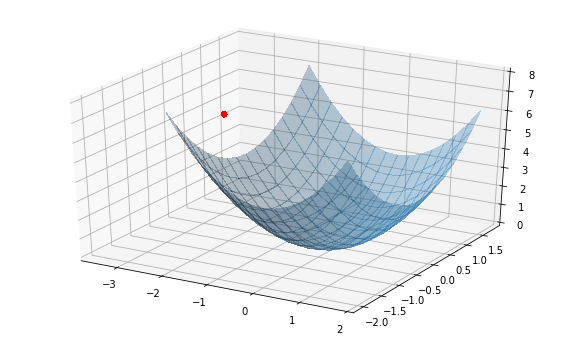

In [14]:
def f(a,b):
    return a**2 + b**2
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

a = np.array([x[0] for x in History])
b = np.array([x[1] for x in History])

c = [compute_cost(new_X, y, W) for W in History]
print(c)
ax.scatter(a, b, c, color="r"); 

plt.show()

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c = f(a,b)
ax.scatter(a, b, c, color="r"); 

plt.show()

TypeError: 'module' object is not callable

# Testing with alpha = 0.003

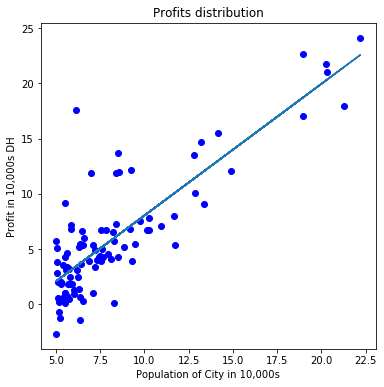

In [36]:
W = zeros(shape=(2, 1)) #initialize W again
W2 = gradient_descent(new_X,y,W,0.003,12000,1)

# Testing with alpha = 0.01

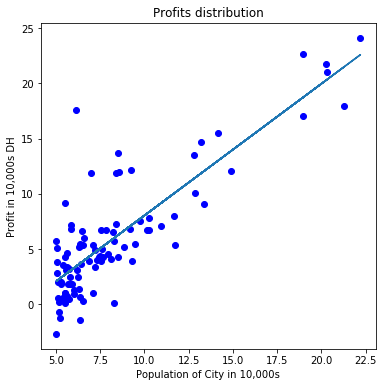

In [37]:
W = zeros(shape=(2, 1)) #initialize W again
W3 = gradient_descent(new_X,y,W,0.01,12000,1)

# Testing with alpha = 0.03 (Overshotting)

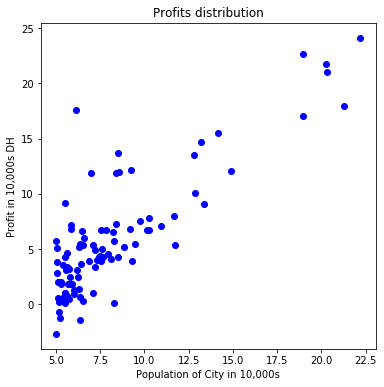

In [38]:
W = zeros(shape=(2, 1)) #initialize W again in this case it's overshooting the minimum
W4 = gradient_descent(new_X,y,W,0.03,12000,1)

In [52]:
print("Alpha = 0.001 Cost is : {}".format(compute_cost(new_X,y,W1)))
print("Alpha = 0.003 Cost is : {}".format(compute_cost(new_X,y,W2)))
print("Alpha = 0.01 Cost is : {}".format(compute_cost(new_X,y,W3)))
print("Alpha = 0.03 Cost is : {}".format(compute_cost(new_X,y,W4)))


Alpha = 0.001 Cost is : 4.495981649220805
Alpha = 0.003 Cost is : 4.476974686657377
Alpha = 0.01 Cost is : 4.476971375975179
Alpha = 0.03 Cost is : nan


# Finding the best Alpha

In [53]:
costs_and_lr = []
pr = []
for alpha in np.arange (0.001,0.02,0.0001):
    W = zeros(shape=(2, 1))
    W = gradient_descent(new_X,y,W,alpha,12000,0)
    cost = compute_cost(new_X,y,W)
    pr = [alpha,cost]
    costs_and_lr.append(pr)
costs_and_lr.sort(key = lambda x:x[1])

In [54]:
print("Best learning Rate is : {}".format(costs_and_lr[0]))

Best learning Rate is : [0.009100000000000004, 4.476971375975177]


the best alpha isn't really far from 0.01 that we already choose

In [15]:
import matplotlib
def f(a,b):
    return a**2 + b**2

fig = figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False,cmap='rainbow')
ax.set_zlim(-0.01, 8.01)

ValueError: Unknown projection '3d'